In [1]:
import numpy as np 

In [2]:

import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
#import contextily as ctx



base_total = pd.read_csv( 
    '/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/tp2/MET4OP/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv', sep=",")
    
base_total


,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO
...,...,...,...,...,...,...,...,...,...,...
616673,1,1015,1015000167,0101507413X,901015000000,87,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616674,1,1015,1015000167,0101507413X,901015000000,VB,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO
616675,1,1015,1015000167,0101507413X,901015000000,VII,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO
616676,1,1015,1015000167,0101507413X,901015000000,VN,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO


In [3]:
base_limpia = base_total[["VOTOS_AGRUPACION", "NOMBRE_CATEGORIA", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]   #creamos una nueva base solo con los datos que necesitamos
base_limpia

,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO
...,...,...,...,...
616673,7,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616674,25,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,BLANCO
616675,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,IMPUGNADO
616676,0,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO


In [4]:
base_limpia[base_limpia['NOMBRE_AGRUPACION']=="UNITE POR LA LIBERTAD Y LA DIGNIDAD"]    #filtramos por partido



,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
9,4,Presidente y Vicepresidente de la República,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD
23,9,Presidente y Vicepresidente de la República,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD
37,6,Presidente y Vicepresidente de la República,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD
51,16,Presidente y Vicepresidente de la República,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD
65,10,Presidente y Vicepresidente de la República,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD
...,...,...,...,...
616625,5,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616637,4,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616649,14,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD
616661,6,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,UNITE POR LA LIBERTAD Y LA DIGNIDAD


In [5]:
#Filtramos las variables de Presidente y Vicepresidente
presi_vice = base_limpia[base_limpia["NOMBRE_CATEGORIA"]== 'Presidente y Vicepresidente de la República']
print(presi_vice)

        VOTOS_AGRUPACION                             NOMBRE_CATEGORIA  \
0                      1  Presidente y Vicepresidente de la República   
1                      5  Presidente y Vicepresidente de la República   
2                      2  Presidente y Vicepresidente de la República   
3                     15  Presidente y Vicepresidente de la República   
4                     85  Presidente y Vicepresidente de la República   
...                  ...                                          ...   
103721                10  Presidente y Vicepresidente de la República   
103722                13  Presidente y Vicepresidente de la República   
103723                 0  Presidente y Vicepresidente de la República   
103724                 0  Presidente y Vicepresidente de la República   
103725                 0  Presidente y Vicepresidente de la República   

       NOMBRE_REGION                               NOMBRE_AGRUPACION  
0          COMUNA 01                        MOVIMIEN

In [84]:
total_partidos=presi_vice.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False)
total_partidos

,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
7,JUNTOS POR EL CAMBIO,863169
3,FRENTE DE TODOS,637891
1,CONSENSO FEDERAL,168607
2,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,75746
13,UNITE POR LA LIBERTAD Y LA DIGNIDAD,68828
0,BLANCO,62397
4,FRENTE NOS,22592
8,MOVIMIENTO AL SOCIALISMO,21470
10,NULO,19116
5,FRENTE PATRIOTA,5172


In [85]:

total_partidos_comunas =presi_vice.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()
total_partidos_comunas 



,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4368
3,COMUNA 01,FRENTE DE TODOS,42299
4,COMUNA 01,FRENTE NOS,1763
...,...,...,...
205,COMUNA 15,MOVIMIENTO DE ACCION VECINAL,159
206,COMUNA 15,NULO,1358
207,COMUNA 15,PARTIDO AUTONOMISTA,125
208,COMUNA 15,RECURRIDO,61


In [88]:
unite_comunas=total_partidos_comunas.loc[total_partidos_comunas.NOMBRE_AGRUPACION == "UNITE POR LA LIBERTAD Y LA DIGNIDAD"].sort_values(by="NOMBRE_REGION", ascending=True)
unite_comunas

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
13,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4106
27,COMUNA 02,UNITE POR LA LIBERTAD Y LA DIGNIDAD,3627
41,COMUNA 03,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4051
55,COMUNA 04,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4134
69,COMUNA 05,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4277
83,COMUNA 06,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4759
97,COMUNA 07,UNITE POR LA LIBERTAD Y LA DIGNIDAD,5099
111,COMUNA 08,UNITE POR LA LIBERTAD Y LA DIGNIDAD,2964
125,COMUNA 09,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4355
139,COMUNA 10,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4367


In [7]:
#Filtro comuna 1
comuna1 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 01']
#comuna1

In [8]:
#Sumo todos los votos de cada agrupación en la comuna 1
vot1 = pd.DataFrame(comuna1.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot1

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,3674
CONSENSO FEDERAL,8305
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4368
FRENTE DE TODOS,42299
FRENTE NOS,1763
FRENTE PATRIOTA,379
IMPUGNADO,14
JUNTOS POR EL CAMBIO,54568
MOVIMIENTO AL SOCIALISMO,1186


In [9]:
#Hacemos lo mismo con cada una de las comunas.
comuna2 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 02'] #Comuna 2
vot2 = pd.DataFrame(comuna2.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot2

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,2493
CONSENSO FEDERAL,6604
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,2620
FRENTE DE TODOS,19615
FRENTE NOS,1841
FRENTE PATRIOTA,178
IMPUGNADO,21
JUNTOS POR EL CAMBIO,65519
MOVIMIENTO AL SOCIALISMO,840


In [10]:
comuna3 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 03'] #Comuna 3
vot3 = pd.DataFrame(comuna3.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot3

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,3790
CONSENSO FEDERAL,9685
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5124
FRENTE DE TODOS,43139
FRENTE NOS,1419
FRENTE PATRIOTA,402
IMPUGNADO,7
JUNTOS POR EL CAMBIO,46502
MOVIMIENTO AL SOCIALISMO,1380


In [11]:
comuna4 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 04'] #Comuna 4
vot4 = pd.DataFrame(comuna4.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot4

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,5801
CONSENSO FEDERAL,10671
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5798
FRENTE DE TODOS,57837
FRENTE NOS,1622
FRENTE PATRIOTA,443
IMPUGNADO,35
JUNTOS POR EL CAMBIO,47191
MOVIMIENTO AL SOCIALISMO,1473


In [12]:
comuna5 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 05'] #Comuna 5
vot5 = pd.DataFrame(comuna2.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot5

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,2493
CONSENSO FEDERAL,6604
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,2620
FRENTE DE TODOS,19615
FRENTE NOS,1841
FRENTE PATRIOTA,178
IMPUGNADO,21
JUNTOS POR EL CAMBIO,65519
MOVIMIENTO AL SOCIALISMO,840


In [13]:
comuna6 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 06'] #Comuna 6
vot6 = pd.DataFrame(comuna6.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot6

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,3968
CONSENSO FEDERAL,12071
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5248
FRENTE DE TODOS,38548
FRENTE NOS,1084
FRENTE PATRIOTA,279
IMPUGNADO,9
JUNTOS POR EL CAMBIO,58450
MOVIMIENTO AL SOCIALISMO,1721


In [14]:
comuna7 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 07'] #Comuna 7
vot7 = pd.DataFrame(comuna7.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot7

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4631
CONSENSO FEDERAL,12772
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5247
FRENTE DE TODOS,47901
FRENTE NOS,1444
FRENTE PATRIOTA,358
IMPUGNADO,55
JUNTOS POR EL CAMBIO,53251
MOVIMIENTO AL SOCIALISMO,1641


In [15]:
comuna8 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 08'] #Comuna 8
vot8 = pd.DataFrame(comuna8.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot8

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,3792
CONSENSO FEDERAL,8297
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4018
FRENTE DE TODOS,51803
FRENTE NOS,1421
FRENTE PATRIOTA,354
IMPUGNADO,68
JUNTOS POR EL CAMBIO,31848
MOVIMIENTO AL SOCIALISMO,847


In [16]:
comuna9 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 09'] #Comuna 9
vot9 = pd.DataFrame(comuna9.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot9

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,3818
CONSENSO FEDERAL,11999
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4568
FRENTE DE TODOS,44797
FRENTE NOS,1395
FRENTE PATRIOTA,389
IMPUGNADO,30
JUNTOS POR EL CAMBIO,42504
MOVIMIENTO AL SOCIALISMO,1198


In [17]:
comuna10 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 10'] #Comuna 10
vot10 = pd.DataFrame(comuna10.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot10

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4031
CONSENSO FEDERAL,12605
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5148
FRENTE DE TODOS,40478
FRENTE NOS,1477
FRENTE PATRIOTA,339
IMPUGNADO,23
JUNTOS POR EL CAMBIO,47071
MOVIMIENTO AL SOCIALISMO,1480


In [18]:
comuna11 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 11'] #Comuna 11
vot11 = pd.DataFrame(comuna11.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot11

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4363
CONSENSO FEDERAL,14253
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5461
FRENTE DE TODOS,42788
FRENTE NOS,1546
FRENTE PATRIOTA,393
IMPUGNADO,21
JUNTOS POR EL CAMBIO,60101
MOVIMIENTO AL SOCIALISMO,1557


In [19]:
comuna12 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 12'] #Comuna 12
vot12 = pd.DataFrame(comuna12.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot12

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4720
CONSENSO FEDERAL,14814
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,6180
FRENTE DE TODOS,45793
FRENTE NOS,1621
FRENTE PATRIOTA,383
IMPUGNADO,27
JUNTOS POR EL CAMBIO,69058
MOVIMIENTO AL SOCIALISMO,1759


In [20]:
comuna13 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 13'] #Comuna 13
vot13 = pd.DataFrame(comuna13.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot13

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4895
CONSENSO FEDERAL,12963
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,5457
FRENTE DE TODOS,36370
FRENTE NOS,1848
FRENTE PATRIOTA,301
IMPUGNADO,16
JUNTOS POR EL CAMBIO,97275
MOVIMIENTO AL SOCIALISMO,1630


In [21]:
comuna14 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 14'] #Comuna 14
vot14 = pd.DataFrame(comuna14.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot14

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4102
CONSENSO FEDERAL,11017
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,4675
FRENTE DE TODOS,35605
FRENTE NOS,1777
FRENTE PATRIOTA,298
IMPUGNADO,26
JUNTOS POR EL CAMBIO,90998
MOVIMIENTO AL SOCIALISMO,1453


In [22]:
comuna15 = presi_vice[presi_vice["NOMBRE_REGION"]=='COMUNA 15'] #Comuna 15
vot15 = pd.DataFrame(comuna15.groupby(["NOMBRE_AGRUPACION"])["VOTOS_AGRUPACION"].sum())
vot15

,VOTOS_AGRUPACION
NOMBRE_AGRUPACION,
BLANCO,4509
CONSENSO FEDERAL,11488
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,6094
FRENTE DE TODOS,47133
FRENTE NOS,1074
FRENTE PATRIOTA,335
IMPUGNADO,16
JUNTOS POR EL CAMBIO,50344
MOVIMIENTO AL SOCIALISMO,1648


In [23]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
total_agrupados=presi_vice.groupby("NOMBRE_AGRUPACION")["VOTOS_AGRUPACION"].sum()
total_agrupados


NOMBRE_AGRUPACION
BLANCO                                             62397
CONSENSO FEDERAL                                  168607
FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD     75746
FRENTE DE TODOS                                   637891
FRENTE NOS                                         22592
FRENTE PATRIOTA                                     5172
IMPUGNADO                                            383
JUNTOS POR EL CAMBIO                              863169
MOVIMIENTO AL SOCIALISMO                           21470
MOVIMIENTO DE ACCION VECINAL                        2406
NULO                                               19116
PARTIDO AUTONOMISTA                                 2126
RECURRIDO                                            644
UNITE POR LA LIBERTAD Y LA DIGNIDAD                68828
Name: VOTOS_AGRUPACION, dtype: int64

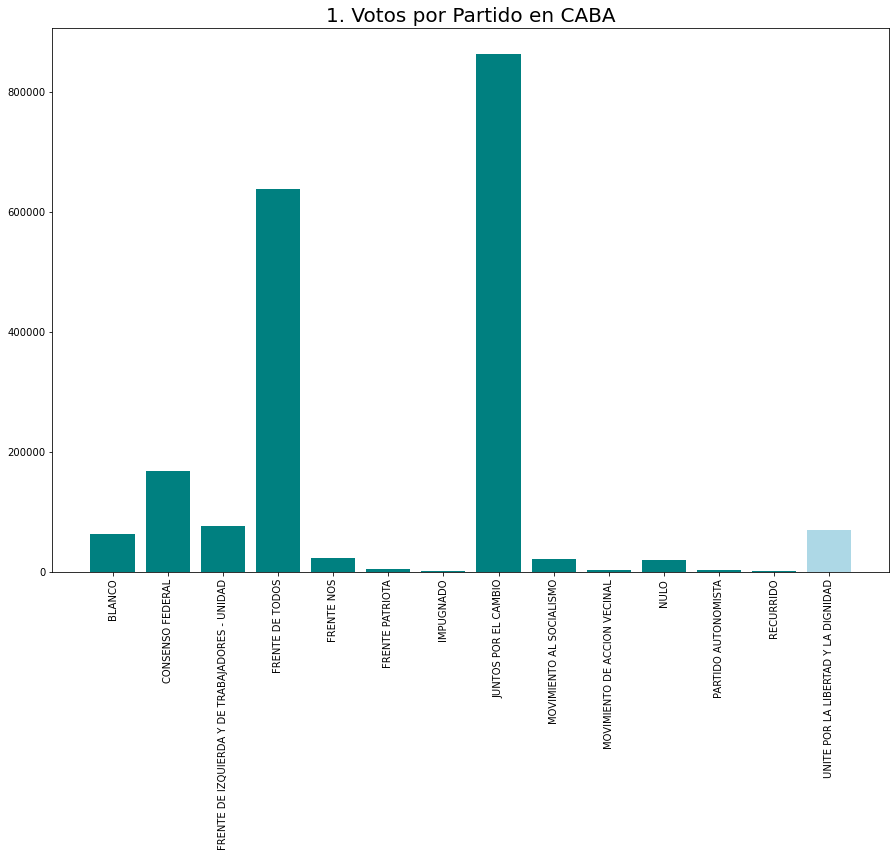

In [25]:
plt.figure(figsize=(15,10))
color = ["#ADD8E6"if partido=="UNITE POR LA LIBERTAD Y LA DIGNIDAD" else "#008080" for partido in total_agrupados.index]
plt.bar(x=total_agrupados.index,height=total_agrupados,color=color)        
plt.xticks(rotation=90)
plt.title("1. Votos por Partido en CABA",fontsize=20)
plt.show()

In [26]:
partido_unite=presi_vice.loc[presi_vice["NOMBRE_AGRUPACION"]=="UNITE POR LA LIBERTAD Y LA DIGNIDAD"]
votos_comuna= partido_unite.groupby("NOMBRE_REGION")["VOTOS_AGRUPACION"].sum()

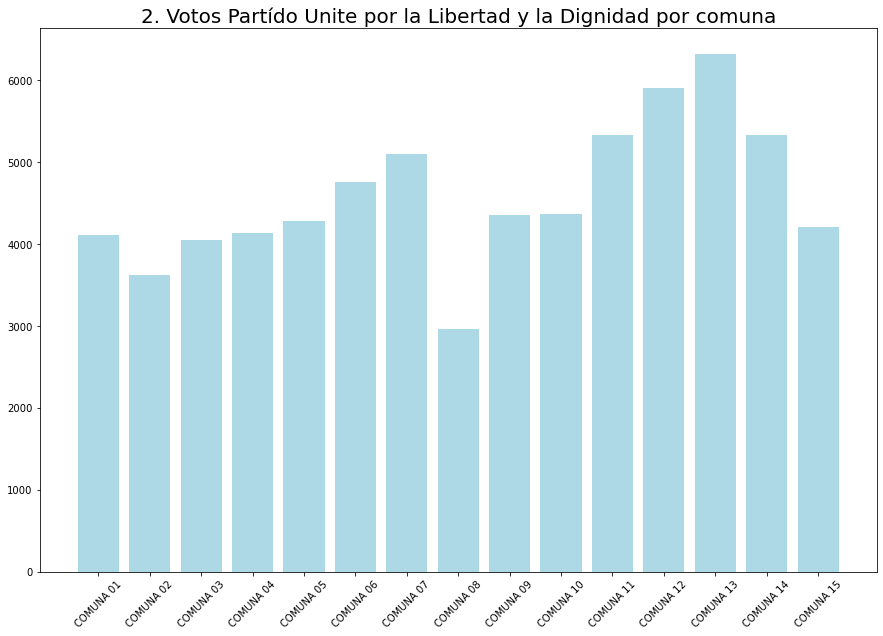

In [27]:
plt.figure(figsize=(15,10))
plt.bar(x=votos_comuna.index,height=votos_comuna,color=["#ADD8E6"])        
plt.xticks(rotation=45)
plt.title("2. Votos Partído Unite por la Libertad y la Dignidad por comuna",fontsize=20)
plt.show()

In [28]:
analisis_final= pd.pivot_table(presi_vice,values="VOTOS_AGRUPACION",index="NOMBRE_REGION",columns="NOMBRE_AGRUPACION",aggfunc="sum")

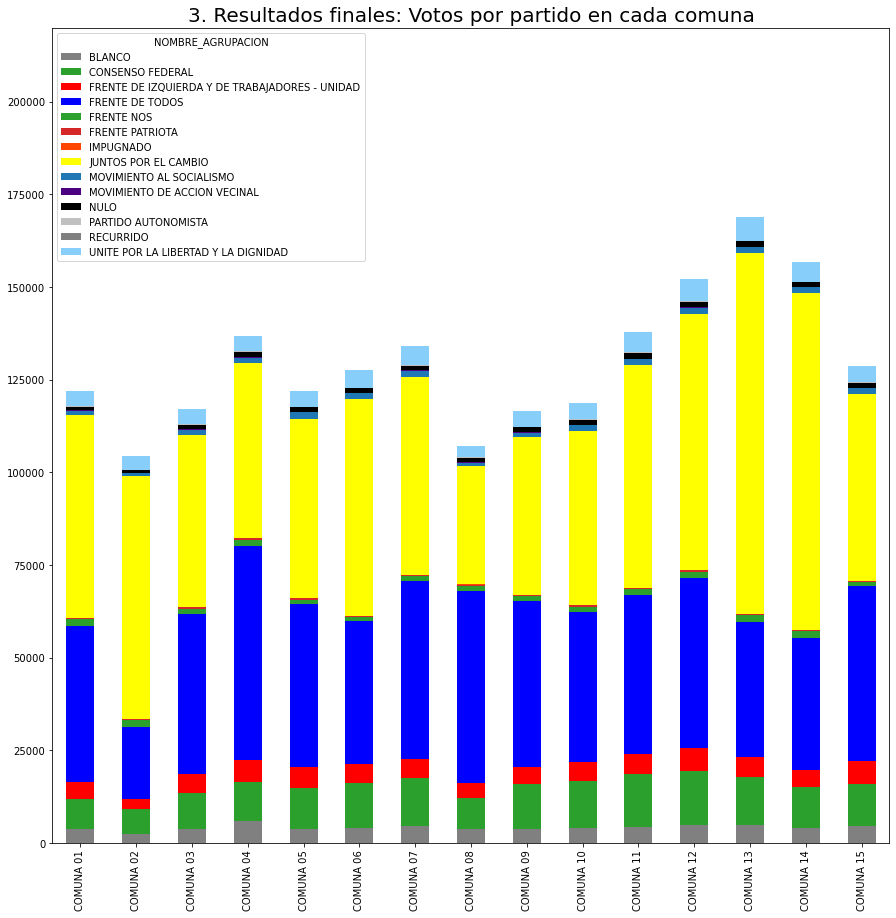

In [29]:
colors = ["gray","C12","red","b","C2","C3","orangered","yellow","C10","indigo","k","silver","C7","lightskyblue"]
analisis_final.plot(kind="bar",stacked=True,figsize=(15,15),ylim=(0,220000),xlabel="",color=colors)
plt.title("3. Resultados finales: Votos por partido en cada comuna",fontsize=20)
plt.show()  

# ANALISIS # 

El *gráfico N1* expone los resultados generales de las elecciones Primarias Abiertas Simultaneas Obligatorias del 2019
para el cargo Ejecutivo Nacional. El partido Unite por la Libertad y la Dignidad se posicionó como la quinta fuerza más votada 
en la Ciudad Autónoma de Buenos Aires. Si profundizamos en los resultados, como muestra el *gráfico N2*, el partido representado por 
Jose Luis Espert concentró la mayoría de sus votos en la Comuna 13, que está conformada por los barrios del Noreste de la Ciudad, tales como Nuñez, Colegiales y 
Belgrano. Contrariamente, bien podría considerarse que en la Comuna 8 (ubicada en la zona Suroeste, entre los barrios Villa 
Lugano, Villa Soldati y Villa Riachuelo) era evidente que la agrupación no iba a hacer una gran elección. De hecho, así como lo 
expresa el *gráfico N2*, fue en la comuna que logró menos votos. Y si continuamos con los puntos débiles del partido, en la 
comuna 4 (Nueva Pompeya, Parque Patricios, Barracas y la Boca) y en la 5 (Almagro y Boedo) se repiten los resultados electorales bajos.

Sin embargo, llama la atención que el segundo distrito donde menos votos recibió la nueva fuerza fue en la comuna 2, delimitada por el barrio de
Recoleta. Esto puede verse en el *gráfico N3*, allí donde Juntos por el Cambio hizo su mejor performance.

Siguiendo éste analisis creemos que la mejor estrategia a llevar adelante por Unite es la siguiente: por un lado, desistir de sus esfuerzos en la campaña electoral allí donde menos
desempeño positivo obtuvo, es decir, en el cordón sur de CABA. Inversamente, se recomienda destinar dichos recursos materiales y humanos en aquellos sectores de la capital
donde más votos cosechó. Esto, con el objetivo de obtener mas votos de cara a los proximos comicios, pues donde en las PASO le fue bien podría incluso aumentar su caudal. Como ya mencionamos, la comuna 13, más las secciones comprendidas en la comuna 14 (Palermo) y la 12 (Coghlan, Villa Urquiza, Villa Pueyredon y Saavedra), donde tambien tuvo un desempeño considerable.

Cabe destacar tambien, como exhibe el *grafico N3* que la tasa de victoria de JxC coincide con el buen desempeño de Unite; esto significa que en las comunas donde JxC ganó, hay una alza en los votos del segundo. Y al posicionarse ambos partidos dentro del mismo espectro ideológico, Espert podría erosionar parte del voto cambiemista a su favor. Y teniendo en cuenta el partido representado por Macri ganó en la comuna 2, se sugiere hacer más hincapie en la campaña electoral y amentar las presencia en esa zona, puesto que es una región con alto potencial de votos en favor de Espert.


  ## __PARTE 2__

importo los CIRCUITOS ELECTORALES 

In [30]:
circuitoscaba=gpd.read_file("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/elecciones_2019/CABA.shp") 
                    #CAMBIAR EL LINK
                    #VIKI: "/Users/cataa/Desktop/MET4OP/MET4OP/dataset/elecciones_2019/CABA.shp"
                    #CATA: "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/elecciones_2019/CABA.shp"
circuitoscaba




,distrito,provincia,departamen,cabecera,circuito,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,Comuna 4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,Comuna 3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,Comuna 1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,Comuna 13,Comuna 13,0135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,01,Ciudad Autónoma de Buenos Aires,Comuna 14,Comuna 14,0149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,01,Ciudad Autónoma de Buenos Aires,Comuna 9,Comuna 9,0101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,01,Ciudad Autónoma de Buenos Aires,Comuna 10,Comuna 10,0102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


los ordenamos

In [32]:
circuitoscaba ['COMUNA'] = circuitoscaba ['COMUNA'].apply(str) # convertimos a string para poder homogeneizar datos
circuitoscaba['COMUNA'] = circuitoscaba ['COMUNA'].str[-2: ] 
circuitoscaba

,distrito,provincia,COMUNA,cabecera,CIRCUITO,indec_p,indec_d,geometry
0,01,Ciudad Autónoma de Buenos Aires,1,Comuna 1,0003,02,001,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,01,Ciudad Autónoma de Buenos Aires,4,Comuna 4,0045,02,004,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,01,Ciudad Autónoma de Buenos Aires,3,Comuna 3,0037,02,003,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,01,Ciudad Autónoma de Buenos Aires,1,Comuna 1,0018,02,001,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,01,Ciudad Autónoma de Buenos Aires,13,Comuna 13,0141,02,013,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...,...,...,...,...,...
162,01,Ciudad Autónoma de Buenos Aires,13,Comuna 13,0135,02,013,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,01,Ciudad Autónoma de Buenos Aires,14,Comuna 14,0149,02,014,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,01,Ciudad Autónoma de Buenos Aires,9,Comuna 9,0101,02,009,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,01,Ciudad Autónoma de Buenos Aires,10,Comuna 10,0102,02,010,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


In [55]:
circuitoscaba.rename(columns={'departamen':'COMUNA', 'circuito': 'CIRCUITO'}, inplace=True)  #OJO ESTO ESTA COPIADO EXACTO DE LO DE LUISA HAY QUE REVISAR
circuitoscaba[['COMUNA', 'CIRCUITO', 'geometry']]  

,COMUNA,CIRCUITO,geometry
0,1,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,4,0045,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,3,0037,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,1,0018,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,13,0141,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...
162,13,0135,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,14,0149,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,9,0101,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,10,0102,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


In [59]:
circuitoscaba_ordenado = circuitoscaba[['COMUNA', 'CIRCUITO', 'geometry']]  
circuitoscaba_ordenado

,COMUNA,CIRCUITO,geometry
0,1,0003,"POLYGON Z ((-6496304.252 -4084732.697 0.000, -..."
1,4,0045,"POLYGON Z ((-6501230.474 -4091702.182 0.000, -..."
2,3,0037,"POLYGON Z ((-6501166.688 -4087904.826 0.000, -..."
3,1,0018,"POLYGON Z ((-6498832.986 -4088373.028 0.000, -..."
4,13,0141,"POLYGON Z ((-6503862.400 -4078547.361 0.000, -..."
...,...,...,...
162,13,0135,"POLYGON Z ((-6507834.614 -4077215.626 0.000, -..."
163,14,0149,"POLYGON Z ((-6503253.371 -4080723.227 0.000, -..."
164,9,0101,"POLYGON Z ((-6515182.479 -4090061.116 0.000, -..."
165,10,0102,"POLYGON Z ((-6514598.831 -4088679.114 0.000, -..."


<AxesSubplot:>

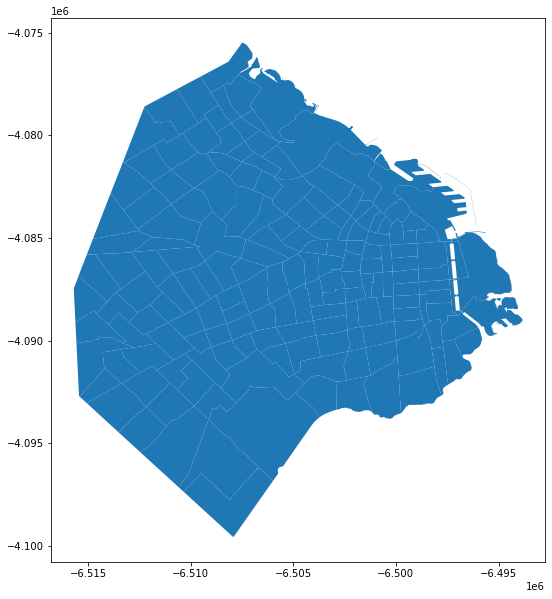

In [33]:
circuitoscaba.plot (figsize=(10, 10))

importamos Rosetta

In [34]:
rosetta= pd.read_csv ('https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/rosetta.csv')
rosetta

,CODIGO_MESA_2019,CODIGO_CIRCUITO_2017
0,0100100001X,1001000001
1,0100100002X,1001000001
2,0100100003X,1001000001
3,0100100004X,1001000001
4,0100100005X,1001000001
...,...,...
7408,0101507409X,1015000167
7409,0101507410X,1015000167
7410,0101507411X,1015000167
7411,0101507412X,1015000167


importo los RADIOS CENSALES

In [35]:
radios_censales = gpd.read_file("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")
       
       #acordarse de cambiar el path cuando importan 
       #VIKI: "/Users/cataa/Desktop/MET4OP/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp")
       #CATA: "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
       
radios_censales

,AREA,PERIMETER,PAIS0210_,PAIS0210_I,PROV,DEPTO,FRAC,RADIO,TIPO,LINK,VARONES,MUJERES,TOT_POB,HOGARES,VIV_PART,VIV_PART_H,geometry
0,1760908.00,7579.745,2,1,02,013,03,02,U,020130302,312.0,342.0,654.0,270.0,377.0,265.0,"POLYGON ((4192267.085 6152975.831, 4192240.425..."
1,2240206.00,14184.670,3,2,02,013,11,01,U,020131101,296.0,272.0,568.0,172.0,217.0,170.0,"POLYGON ((4193005.531 6152773.045, 4193022.852..."
2,28001.00,720.460,4,3,02,013,01,04,U,020130104,379.0,384.0,763.0,367.0,524.0,355.0,"POLYGON ((4192119.600 6153045.088, 4192222.042..."
3,68016.38,1084.790,5,4,02,013,01,03,U,020130103,286.0,326.0,612.0,258.0,314.0,254.0,"POLYGON ((4192119.600 6153045.088, 4192124.424..."
4,53839.88,948.102,6,5,02,013,01,02,U,020130102,373.0,397.0,770.0,343.0,408.0,340.0,"POLYGON ((4191961.799 6152874.180, 4191960.076..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3550,91488.00,1209.676,3552,3537,02,008,12,02,U,020081202,461.0,543.0,1004.0,356.0,378.0,330.0,"POLYGON ((4190496.745 6136003.489, 4190585.718..."
3551,120426.10,1403.462,3553,3538,02,008,09,07,U,020080907,330.0,442.0,772.0,260.0,297.0,243.0,"POLYGON ((4190063.362 6136008.824, 4190168.025..."
3552,91443.13,1210.355,3554,3539,02,008,12,05,U,020081205,475.0,503.0,978.0,341.0,397.0,314.0,"POLYGON ((4190699.346 6135786.829, 4190801.651..."
3553,118110.30,1390.708,3555,3540,02,008,12,01,U,020081201,427.0,488.0,915.0,306.0,354.0,293.0,"POLYGON ((4190269.797 6135788.912, 4190371.127..."


<AxesSubplot:>

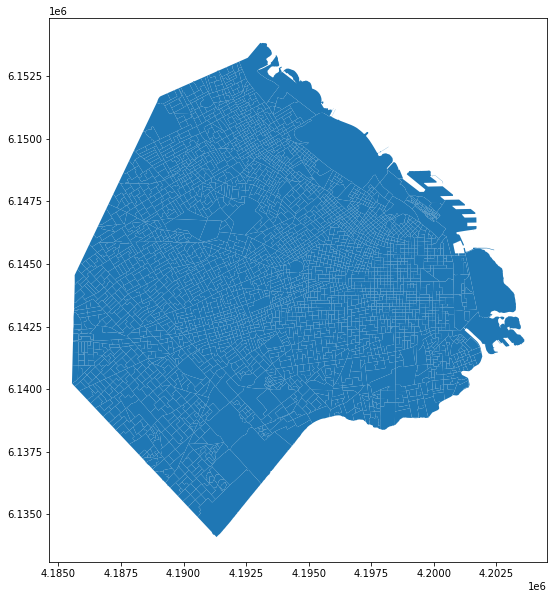

In [36]:
radios_censales.plot (figsize=(10, 10))

Traigo mi base de datos limpia con solo mi partido politico (ya la habiamos extraido y limpiado en la parte 1 del tp)

In [89]:
unite_comunas

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
13,COMUNA 01,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4106
27,COMUNA 02,UNITE POR LA LIBERTAD Y LA DIGNIDAD,3627
41,COMUNA 03,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4051
55,COMUNA 04,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4134
69,COMUNA 05,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4277
83,COMUNA 06,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4759
97,COMUNA 07,UNITE POR LA LIBERTAD Y LA DIGNIDAD,5099
111,COMUNA 08,UNITE POR LA LIBERTAD Y LA DIGNIDAD,2964
125,COMUNA 09,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4355
139,COMUNA 10,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4367


In [90]:
unite_comunas ['NOMBRE_REGION'] = unite_comunas ['NOMBRE_REGION'].apply(str) # lo paso a string asi puedo tomar los valores que me interesan que son solo los numeros de las comunas para mergear
unite_comunas ['NOMBRE_REGION'] = unite_comunas ['NOMBRE_REGION'].str[-2: ] 
unite_comunas

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
13,01,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4106
27,02,UNITE POR LA LIBERTAD Y LA DIGNIDAD,3627
41,03,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4051
55,04,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4134
69,05,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4277
83,06,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4759
97,07,UNITE POR LA LIBERTAD Y LA DIGNIDAD,5099
111,08,UNITE POR LA LIBERTAD Y LA DIGNIDAD,2964
125,09,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4355
139,10,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4367


le ponemos el mismo nombre a la comuna para mergear

In [91]:
unite_comunas.rename(columns={'NOMBRE_REGION':'COMUNA'}, inplace=True)   
unite_comunas 

,COMUNA,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
13,01,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4106
27,02,UNITE POR LA LIBERTAD Y LA DIGNIDAD,3627
41,03,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4051
55,04,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4134
69,05,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4277
83,06,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4759
97,07,UNITE POR LA LIBERTAD Y LA DIGNIDAD,5099
111,08,UNITE POR LA LIBERTAD Y LA DIGNIDAD,2964
125,09,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4355
139,10,UNITE POR LA LIBERTAD Y LA DIGNIDAD,4367


## de acá en adelante ya no me salio nada, paso a nuestra variable ##


In [93]:
aver2 = pd.merge (unite_comunas, circuitoscaba_ordenado, left_on= "comuna", right_index="votos_agrupacion")
aver2 

ValueError: right_index parameter must be of type bool, not <class 'str'>

In [ ]:
votos_comuna=pd.merge(comunas_, resultados_absolutos, left_on="COMUNAS", right_on="NOMBRE_REGION")
votos_comuna

Importo los csv de los censos

In [41]:
provincia = pd.read_csv("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/prov.csv")   #CAMBIAR LINKS
provincia 

#CATA: ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/prov.csv")

,PROV_REF_ID,CPV2010_REF_ID,IDPROV,PROV,NOMPROV
0,1,1,2,2,Ciudad Autónoma de Buenos Aires ...
1,2,1,6,6,Buenos Aires ...
2,3,1,10,10,Catamarca ...
3,4,1,14,14,Córdoba ...
4,5,1,18,18,Corrientes ...
5,6,1,22,22,Chaco ...
6,7,1,26,26,Chubut ...
7,8,1,30,30,Entre Ríos ...
8,9,1,34,34,Formosa ...
9,10,1,38,38,Jujuy ...


In [42]:
departamento = pd.read_csv("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/dpto.csv")   #CAMBIAR LINKS
departamento

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/dpto.csv")

,DPTO_REF_ID,PROV_REF_ID,IDDPTO,DPTO,NOMDPTO
0,1,1,1,2001,Comuna 01 ...
1,2,1,2,2002,Comuna 02 ...
2,3,1,3,2003,Comuna 03 ...
3,4,1,4,2004,Comuna 04 ...
4,5,1,5,2005,Comuna 05 ...
5,6,1,6,2006,Comuna 06 ...
6,7,1,7,2007,Comuna 07 ...
7,8,1,8,2008,Comuna 08 ...
8,9,1,9,2009,Comuna 09 ...
9,10,1,10,2010,Comuna 10 ...


In [43]:
fraccion = pd.read_csv ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/frac.csv")   #CAMBIAR LINK
fraccion 

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/frac.csv"

,FRAC_REF_ID,DPTO_REF_ID,IDFRAC
0,1,1,1
1,2,1,2
2,3,1,3
3,4,1,4
4,5,1,5
...,...,...,...
346,347,15,17
347,348,15,18
348,349,15,19
349,350,15,20


In [44]:
radio = pd.read_csv ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radio.csv")  #CAMBIAR LINK
radio

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/radio.csv"

,RADIO_REF_ID,FRAC_REF_ID,IDRADIO
0,1,1,1
1,2,2,1
2,3,2,2
3,4,2,3
4,5,2,4
...,...,...,...
3547,3549,351,9
3548,3550,351,10
3549,3551,351,11
3550,3552,351,12


In [45]:
vivienda = pd.read_csv ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/vivienda.csv") #CAMBIAR LINK
vivienda

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/vivienda.csv

,VIVIENDA_REF_ID,RADIO_REF_ID,TIPVV,V01,V02,V00,URP,INCALSERV,INMAT,MUNI,LOCAL,INCALCONS,TOTHOG
0,1,1,1,1,1,0,1,1,1,20010001,2001010,1,2
1,2,1,1,7,1,0,1,1,2,20010001,2001010,2,2
2,3,1,1,4,1,0,1,1,1,20010001,2001010,1,2
3,4,1,1,4,1,0,1,1,1,20010001,2001010,1,1
4,5,1,1,1,1,0,1,3,3,20010001,2001010,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085458,1426434,3553,1,4,1,0,1,1,1,20150001,2015010,1,1
1085459,1426435,3553,1,4,1,0,1,1,1,20150001,2015010,1,1
1085460,1426436,3553,1,4,1,0,1,1,1,20150001,2015010,1,1
1085461,1426437,3553,2,0,0,9,1,0,0,20150001,2015010,0,3


In [46]:
hogar = pd.read_csv ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/hogar.csv")    #CAMBIAR LINK
hogar

#CATA "/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/hogar.csv"

,HOGAR_REF_ID,VIVIENDA_REF_ID,NHOG,H05,H06,H07,H08,H09,H10,H11,...,H15,H16,H19A,H19B,H19C,H19D,PROP,INDHAC,TOTPERS,ALGUNBI
0,1,1,1,1,4,1,1,1,1,1,...,2,2,1,2,1,2,5,1,1,0
1,2,1,2,1,1,1,1,1,1,1,...,1,2,1,1,1,1,1,1,1,0
2,3,1,4,1,3,1,1,1,1,1,...,3,5,1,1,1,1,1,1,2,0
3,4,1,6,1,1,1,1,1,1,1,...,3,5,1,1,1,1,5,6,8,1
4,5,2,1,1,1,2,1,1,1,1,...,5,5,1,1,2,1,6,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152594,1152595,1426434,1,1,2,1,1,1,1,1,...,2,3,1,1,1,1,1,1,1,0
1152595,1152596,1426435,1,1,1,1,1,1,1,1,...,1,2,1,2,2,1,1,1,1,0
1152596,1152597,1426436,1,1,1,1,1,1,1,1,...,2,3,1,1,1,1,1,3,3,0
1152597,1152598,1426437,1000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,2


## el archivo de persona es el que nos importa porque tiene nuestra variable: __SOLO PRIMARIO INCOMPLETO__
## P09 es el nivel que el censado cursó o está cursando
## en la tabla P09 hay que filtrar solo el numero 2 que es el que correponde al primario
## y despues de la tabla P10 (que corresponde a sí esa persona completó o no ese ciclo) hay que filtar por el numero 2 (que significa que no lo terminó) 

In [47]:
persona =pd.read_csv ("/Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/persona.csv")   #CAMBIAR LINK
persona

#CATA /Users/Catalina/Desktop/biblio MET4OP/MET4OP/dataset/censo2010/persona.csv")

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
0,1,1,1,2,61,1,0,1,2,2,13,2,4,2,1
1,2,2,1,1,48,1,0,1,1,2,10,2,4,1,1
2,3,3,1,1,65,1,0,1,1,3,14,2,7,2,1
3,4,3,2,2,62,1,0,1,1,2,13,2,6,1,3
4,5,4,1,1,20,2,221,1,1,2,5,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0
2890147,2890148,1152599,0,2,91,1,0,1,0,3,19,2,6,1,0
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0


In [48]:
primario_total = persona [persona['P09'] == 2]    #filtramos por quienes tienen la categoria primario
primario_total

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
17,18,4,8,1,35,1,0,1,1,2,8,2,2,1,1
19,20,4,8,1,27,1,0,1,1,2,6,2,2,1,1
52,53,19,1,1,33,1,0,1,1,2,7,1,2,2,1
56,57,23,1,1,55,1,0,1,2,2,12,2,2,2,1
64,65,25,3,1,9,1,0,1,1,1,2,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890137,2890138,1152599,0,2,90,2,410,1,0,3,19,2,2,2,0
2890146,2890147,1152599,0,2,95,1,0,1,0,3,20,2,2,1,0
2890148,2890149,1152599,0,2,83,1,0,1,0,3,17,2,2,1,0
2890149,2890150,1152599,0,2,89,1,0,1,0,3,18,2,2,1,0


In [49]:
primario_incompleto = primario_total [primario_total ['P10'] == 2]   #filtramos por quienes no terminaron el primario
primario_incompleto

,PERSONA_REF_ID,HOGAR_REF_ID,P01,P02,P03,P05,P06,P07,P12,EDADAGRU,EDADQUI,P08,P09,P10,CONDACT
52,53,19,1,1,33,1,0,1,1,2,7,1,2,2,1
56,57,23,1,1,55,1,0,1,2,2,12,2,2,2,1
64,65,25,3,1,9,1,0,1,1,1,2,1,2,2,0
75,76,29,1,1,42,1,0,1,2,2,9,2,2,2,1
83,84,31,8,1,38,2,222,2,1,2,8,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2890113,2890114,1152594,3,2,10,1,0,1,1,1,3,1,2,2,0
2890126,2890127,1152598,0,1,9,1,0,1,0,1,2,1,2,2,0
2890127,2890128,1152598,0,1,7,1,0,1,0,1,2,1,2,2,0
2890134,2890135,1152599,0,1,89,1,0,1,0,3,18,2,2,2,0


In [54]:
primario_incompleto_definitivo = primario_incompleto [['P09', 'P10']]     #me quedo con las columnas que importan
primario_incompleto_definitivo

,P09,P10
52,2,2
56,2,2
64,2,2
75,2,2
83,2,2
...,...,...
2890113,2,2
2890126,2,2
2890127,2,2
2890134,2,2
